# Index
### 1. Merging single cell data with clinical data (label)



### 2. Train-Test Split: Making sure train and test sets have different subjects

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#data = pd.read_csv('../preprocessed_data/mat.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../preprocessed_data/mat.csv'

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
#data.shape

In [4]:
#data

In [5]:
#pickle_file_path = '../preprocessed_data/count_matrix_microglia.pkl'
#data.to_pickle(pickle_file_path)

In [4]:


# Load the DataFrame from the pickle file
pickle_file_path = '../../preprocessed_data/microglia/count_matrix_microglia.pkl'
df_loaded = pd.read_pickle(pickle_file_path)

print("Pickle file has been loaded into a DataFrame:")


Pickle file has been loaded into a DataFrame:


In [5]:
df_loaded.set_index('Unnamed: 0', inplace=True)
df_loaded.index.name = 'gene_name'
df_loaded.head()

,AACTTTCAGGATGGTC.1.0,ACGGGCTCAATCAGAA.1.0,AGCGGTCAGATGTTAG.1.0,AGTGAGGGTGGTAACG.1.0,ATTACTCAGGAGTAGA.1.0,CAACCAACAAGCGTAG.1.0,CAGGTGCAGTCCATAC.1.0,CGATGGCGTCTTGTCC.1.0,CGATGGCGTTCTGTTT.1.0,CTGTTTACACATCCAA.1.0,...,TTCACCGTCCTATTGT.16.14,TTCCACGAGGAAAGGT.16.14,TTCGATTAGTATGGCG.16.14,TTCTAGTAGCATGTTC.16.14,TTGCGTCAGCTAGCCC.16.14,TTGGGATCACGGCGTT.16.14,TTGGGTATCGTGTGAT.16.14,TTGTGGAAGATTAGTG.16.14,TTTACCACACTGTCCT.16.14,TTTACCAGTCAACACT.16.14
gene_name,,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_loaded.shape

(33538, 73061)

In [6]:
row_sum = df_loaded.sum(axis=1)

print(row_sum)

gene_name
MIR1302-2HG       2
FAM138A           0
OR4F5             0
AL627309.1     3351
AL627309.3        0
               ... 
AC233755.2        0
AC233755.1        0
AC240274.1     2253
AC213203.1        0
FAM231C           0
Length: 33538, dtype: int64


In [7]:
col_sum = df_loaded.sum(axis=0)
col_sum

AACTTTCAGGATGGTC.1.0      1398
ACGGGCTCAATCAGAA.1.0      1963
AGCGGTCAGATGTTAG.1.0      1742
AGTGAGGGTGGTAACG.1.0      1870
ATTACTCAGGAGTAGA.1.0      1451
                          ... 
TTGGGATCACGGCGTT.16.14    2008
TTGGGTATCGTGTGAT.16.14    2341
TTGTGGAAGATTAGTG.16.14     685
TTTACCACACTGTCCT.16.14    6627
TTTACCAGTCAACACT.16.14    2698
Length: 73061, dtype: int64

In [8]:
df_loaded.tail()

,AACTTTCAGGATGGTC.1.0,ACGGGCTCAATCAGAA.1.0,AGCGGTCAGATGTTAG.1.0,AGTGAGGGTGGTAACG.1.0,ATTACTCAGGAGTAGA.1.0,CAACCAACAAGCGTAG.1.0,CAGGTGCAGTCCATAC.1.0,CGATGGCGTCTTGTCC.1.0,CGATGGCGTTCTGTTT.1.0,CTGTTTACACATCCAA.1.0,...,TTCACCGTCCTATTGT.16.14,TTCCACGAGGAAAGGT.16.14,TTCGATTAGTATGGCG.16.14,TTCTAGTAGCATGTTC.16.14,TTGCGTCAGCTAGCCC.16.14,TTGGGATCACGGCGTT.16.14,TTGGGTATCGTGTGAT.16.14,TTGTGGAAGATTAGTG.16.14,TTTACCACACTGTCCT.16.14,TTTACCAGTCAACACT.16.14
gene_name,,,,,,,,,,,,,,,,,,,,,
AC233755.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC233755.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC240274.1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
AC213203.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FAM231C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
clinical_data = pd.read_csv('/12tb_dsk1/danish/preprocessed_data/clinical/clinical_single_cell.csv')

In [10]:
clinical_data.head()

,individualID,individualIdSource,sex,ethnicity,subject,projid,Study,msex,educ,spanish,...,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,braaksc,ceradsc,cogdx,dcfdx_lv,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD
0,R2626559,Rush,male,NaN,ROSMAP-45310,1211411,ROS,1.0,12.0,2.0,...,85.549624,NaN,24.0,1.0,4.0,4.0,4.0,AD,No AD,False
1,R9936070,Rush,male,NaN,ROSMAP-34387,2899847,MAP,1.0,14.0,2.0,...,74.450376,NaN,27.0,2.0,2.0,3.0,3.0,False,False,False
2,R2367199,Rush,male,NaN,ROSMAP-69520,3713990,MAP,1.0,12.0,2.0,...,87.928816,NaN,30.0,4.0,2.0,1.0,1.0,NCI,False,False
3,R9891381,Rush,female,NaN,ROSMAP-53306,3889845,MAP,0.0,13.0,2.0,...,90.000000,NaN,22.0,2.0,1.0,2.0,2.0,False,AD,False
4,R9033345,Rush,male,NaN,ROSMAP-79585,6107196,MAP,1.0,15.0,2.0,...,90.000000,NaN,22.0,5.0,1.0,4.0,4.0,AD,AD,AD_with_Plaques


In [1]:
clinical_data.shape

NameError: name 'clinical_data' is not defined

In [12]:
single_cell_metadata = pd.read_csv('../../preprocessed_data/microglia/metadata_microglia.csv')

In [13]:
single_cell_metadata

,cell_id,seq_folder,nUMI,nGene,percent.mt,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,log10GenesPerUMI,individualID,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD,train_test_clinical_and_pathological
0,AAACCCAAGACGATAT.4.3,ROSMAP,1199,863,0.667223,Mic P2RY12,ROSMAP-86217,no,0.953616,R5636935,False,No AD,False,NaN
1,AAACCCAAGACGGATC.14.13,ROSMAP,2510,1581,1.434263,Mic P2RY12,ROSMAP-43251,yes,0.940953,R9679238,AD,False,False,NaN
2,AAACCCAAGAGCCATG.10.13,ROSMAP,971,662,1.132853,Mic P2RY12,ROSMAP-55106,no,0.944309,R2506056,NCI,No AD,NCI_with_No_Plaques,train
3,AAACCCAAGAGCGACT.27.5,ROSMAP,1360,953,1.176471,Mic P2RY12,ROSMAP-45924,yes,0.950712,R4249236,False,False,False,NaN
4,AAACCCAAGCAACAGC.31.10,ROSMAP,3610,2024,1.274238,Mic P2RY12,ROSMAP-98683,yes,0.929362,R2144127,AD,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73056,TTTGTTGTCGCTGTCT.3.8,ROSMAP,995,745,1.708543,Mic P2RY12,ROSMAP-70249,no,0.958081,R4292728,False,No AD,False,NaN
73057,TTTGTTGTCGTGTGGC.22.6,ROSMAP,1582,1142,0.063211,Mic P2RY12,ROSMAP-75656,yes,0.955758,R5546461,AD,AD,AD_with_Plaques,train
73058,TTTGTTGTCTAGACAC.20.9,ROSMAP,2142,1382,1.260504,Mic P2RY12,ROSMAP-38977,yes,0.942863,R2575548,NCI,AD,False,NaN
73059,TTTGTTGTCTCAACCC.29.8,ROSMAP,4339,2189,0.622263,Mic P2RY12,ROSMAP-75281,yes,0.918308,R9596785,False,False,False,NaN


In [14]:
single_cell_metadata['cell_id'] = single_cell_metadata['cell_id'].str.replace('-', '.')

In [15]:
single_cell_metadata

,cell_id,seq_folder,nUMI,nGene,percent.mt,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,log10GenesPerUMI,individualID,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD,train_test_clinical_and_pathological
0,AAACCCAAGACGATAT.4.3,ROSMAP,1199,863,0.667223,Mic P2RY12,ROSMAP-86217,no,0.953616,R5636935,False,No AD,False,NaN
1,AAACCCAAGACGGATC.14.13,ROSMAP,2510,1581,1.434263,Mic P2RY12,ROSMAP-43251,yes,0.940953,R9679238,AD,False,False,NaN
2,AAACCCAAGAGCCATG.10.13,ROSMAP,971,662,1.132853,Mic P2RY12,ROSMAP-55106,no,0.944309,R2506056,NCI,No AD,NCI_with_No_Plaques,train
3,AAACCCAAGAGCGACT.27.5,ROSMAP,1360,953,1.176471,Mic P2RY12,ROSMAP-45924,yes,0.950712,R4249236,False,False,False,NaN
4,AAACCCAAGCAACAGC.31.10,ROSMAP,3610,2024,1.274238,Mic P2RY12,ROSMAP-98683,yes,0.929362,R2144127,AD,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73056,TTTGTTGTCGCTGTCT.3.8,ROSMAP,995,745,1.708543,Mic P2RY12,ROSMAP-70249,no,0.958081,R4292728,False,No AD,False,NaN
73057,TTTGTTGTCGTGTGGC.22.6,ROSMAP,1582,1142,0.063211,Mic P2RY12,ROSMAP-75656,yes,0.955758,R5546461,AD,AD,AD_with_Plaques,train
73058,TTTGTTGTCTAGACAC.20.9,ROSMAP,2142,1382,1.260504,Mic P2RY12,ROSMAP-38977,yes,0.942863,R2575548,NCI,AD,False,NaN
73059,TTTGTTGTCTCAACCC.29.8,ROSMAP,4339,2189,0.622263,Mic P2RY12,ROSMAP-75281,yes,0.918308,R9596785,False,False,False,NaN


In [16]:
set(df_loaded.columns) - set(single_cell_metadata['cell_id'])
#confirms that all sets in the single_cell_metadata are present in df_loaded

set()

In [17]:
set(single_cell_metadata['cell_id']) - set(df_loaded.columns)


set()

In [18]:
clinical_data

,individualID,individualIdSource,sex,ethnicity,subject,projid,Study,msex,educ,spanish,...,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,braaksc,ceradsc,cogdx,dcfdx_lv,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD
0,R2626559,Rush,male,NaN,ROSMAP-45310,1211411,ROS,1.0,12.0,2.0,...,85.549624,NaN,24.0,1.0,4.0,4.0,4.0,AD,No AD,False
1,R9936070,Rush,male,NaN,ROSMAP-34387,2899847,MAP,1.0,14.0,2.0,...,74.450376,NaN,27.0,2.0,2.0,3.0,3.0,False,False,False
2,R2367199,Rush,male,NaN,ROSMAP-69520,3713990,MAP,1.0,12.0,2.0,...,87.928816,NaN,30.0,4.0,2.0,1.0,1.0,NCI,False,False
3,R9891381,Rush,female,NaN,ROSMAP-53306,3889845,MAP,0.0,13.0,2.0,...,90.000000,NaN,22.0,2.0,1.0,2.0,2.0,False,AD,False
4,R9033345,Rush,male,NaN,ROSMAP-79585,6107196,MAP,1.0,15.0,2.0,...,90.000000,NaN,22.0,5.0,1.0,4.0,4.0,AD,AD,AD_with_Plaques
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,R9738414,Rush,female,NaN,ROSMAP-90149,20976799,ROS,0.0,18.0,2.0,...,90.000000,NaN,19.0,2.0,4.0,2.0,2.0,False,No AD,False
510,R7737688,Rush,female,NaN,NaN,69866926,MAP,0.0,13.0,2.0,...,84.104038,20.0,3.0,6.0,1.0,4.0,4.0,AD,AD,AD_with_Plaques
511,R7844746,Rush,male,NaN,NaN,29286432,ROS,1.0,24.0,2.0,...,90.000000,NaN,29.0,5.0,2.0,2.0,2.0,False,False,False
512,R6692433,Rush,female,NaN,NaN,48331728,MAP,0.0,14.0,2.0,...,82.715948,NaN,27.0,2.0,4.0,1.0,1.0,NCI,No AD,NCI_with_No_Plaques


In [19]:
len(set(single_cell_metadata.subject))


425

In [20]:
set(clinical_data.subject)-set(single_cell_metadata.subject)

{'ROSMAP-35817', 'ROSMAP-83625', nan}

In [21]:
columns_list = clinical_data.columns.tolist()
print(columns_list)

['individualID', 'individualIdSource', 'sex', 'ethnicity', 'subject', 'projid', 'Study', 'msex', 'educ', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'clinical_diagnosis', 'pathological_diagnosis', 'clinical_pathological_AD']


In [22]:
columns_list = single_cell_metadata.columns.tolist()
print(columns_list)

['cell_id', 'seq_folder', 'nUMI', 'nGene', 'percent.mt', 'cell_type_high_resolution', 'subject', 'Pathologic_diagnosis_of_AD', 'log10GenesPerUMI', 'individualID', 'clinical_diagnosis', 'pathological_diagnosis', 'clinical_pathological_AD', 'train_test_clinical_and_pathological']


In [23]:
single_cell_metadata = pd.merge(single_cell_metadata, clinical_data[['subject', 'individualID','clinical_diagnosis','pathological_diagnosis','clinical_pathological_AD']], on='subject', how='left')
#single_cell_metadata enriched with details about each subject

In [24]:
single_cell_metadata

,cell_id,seq_folder,nUMI,nGene,percent.mt,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,log10GenesPerUMI,individualID_x,clinical_diagnosis_x,pathological_diagnosis_x,clinical_pathological_AD_x,train_test_clinical_and_pathological,individualID_y,clinical_diagnosis_y,pathological_diagnosis_y,clinical_pathological_AD_y
0,AAACCCAAGACGATAT.4.3,ROSMAP,1199,863,0.667223,Mic P2RY12,ROSMAP-86217,no,0.953616,R5636935,False,No AD,False,NaN,R5636935,False,No AD,False
1,AAACCCAAGACGGATC.14.13,ROSMAP,2510,1581,1.434263,Mic P2RY12,ROSMAP-43251,yes,0.940953,R9679238,AD,False,False,NaN,R9679238,AD,False,False
2,AAACCCAAGAGCCATG.10.13,ROSMAP,971,662,1.132853,Mic P2RY12,ROSMAP-55106,no,0.944309,R2506056,NCI,No AD,NCI_with_No_Plaques,train,R2506056,NCI,No AD,NCI_with_No_Plaques
3,AAACCCAAGAGCGACT.27.5,ROSMAP,1360,953,1.176471,Mic P2RY12,ROSMAP-45924,yes,0.950712,R4249236,False,False,False,NaN,R4249236,False,False,False
4,AAACCCAAGCAACAGC.31.10,ROSMAP,3610,2024,1.274238,Mic P2RY12,ROSMAP-98683,yes,0.929362,R2144127,AD,False,False,NaN,R2144127,AD,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89587,TTTGTTGTCGTGTGGC.22.6,ROSMAP,1582,1142,0.063211,Mic P2RY12,ROSMAP-75656,yes,0.955758,R5546461,AD,AD,AD_with_Plaques,train,R5546461,AD,AD,AD_with_Plaques
89588,TTTGTTGTCTAGACAC.20.9,ROSMAP,2142,1382,1.260504,Mic P2RY12,ROSMAP-38977,yes,0.942863,R2575548,NCI,AD,False,NaN,R2575548,NCI,AD,False
89589,TTTGTTGTCTCAACCC.29.8,ROSMAP,4339,2189,0.622263,Mic P2RY12,ROSMAP-75281,yes,0.918308,R9596785,False,False,False,NaN,R9596785,False,False,False
89590,TTTGTTGTCTCTTAAC.4.2,ROSMAP,5354,2536,0.074710,Mic P2RY12,ROSMAP-33422,no,0.912964,R4260171,NCI,No AD,NCI_with_No_Plaques,train,R4260171,NCI,No AD,NCI_with_No_Plaques


In [25]:
single_cell_metadata= single_cell_metadata.drop_duplicates()


In [26]:
single_cell_metadata.shape

(73061, 18)

In [27]:
try:
    single_cell_metadata.clinical_diagnosis.value_counts()
except:
    print('no_columns')

no_columns


In [28]:
try:
    single_cell_metadata.clinical_pathological_AD.value_counts()
except:
    print('no_columns')

no_columns


In [29]:
single_cell_metadata.Pathologic_diagnosis_of_AD.value_counts()

Pathologic_diagnosis_of_AD
yes    40415
no     32646
Name: count, dtype: int64

In [30]:
single_cell_metadata.pathological_diagnosis.value_counts()

AttributeError: 'DataFrame' object has no attribute 'pathological_diagnosis'

In [31]:
rosmap_subject_single_cell_metadata = pd.merge(pd.DataFrame(single_cell_metadata.subject.value_counts()).reset_index(),clinical_data[['subject','clinical_pathological_AD']], on='subject', how='left')

In [32]:
rosmap_subject_single_cell_metadata

,subject,count,clinical_pathological_AD
0,ROSMAP-97522,1108,False
1,ROSMAP-97522,1108,False
2,ROSMAP-74690,751,NCI_with_No_Plaques
3,ROSMAP-74690,751,NCI_with_No_Plaques
4,ROSMAP-44788,736,NCI_with_No_Plaques
...,...,...,...
487,ROSMAP-60910,7,AD_with_Plaques
488,ROSMAP-50976,4,False
489,ROSMAP-27402,3,False
490,ROSMAP-12562,2,False


In [33]:
rosmap_subject_single_cell_metadata = rosmap_subject_single_cell_metadata[~rosmap_subject_single_cell_metadata.isin(['False']).any(axis=1)]
rosmap_subject_single_cell_metadata

,subject,count,clinical_pathological_AD
2,ROSMAP-74690,751,NCI_with_No_Plaques
3,ROSMAP-74690,751,NCI_with_No_Plaques
4,ROSMAP-44788,736,NCI_with_No_Plaques
5,ROSMAP-44788,736,NCI_with_No_Plaques
6,ROSMAP-82681,573,NCI_with_No_Plaques
...,...,...,...
480,ROSMAP-20369,10,NCI_with_No_Plaques
481,ROSMAP-20369,10,NCI_with_No_Plaques
482,ROSMAP-92734,9,NCI_with_No_Plaques
483,ROSMAP-61943,8,NCI_with_No_Plaques


In [34]:
import numpy as np
train_set_size = 0.80*np.sum(list(rosmap_subject_single_cell_metadata['count']))
test_set_size = 0.20*np.sum(list(rosmap_subject_single_cell_metadata['count']))

In [35]:
neg_samples = rosmap_subject_single_cell_metadata[rosmap_subject_single_cell_metadata.clinical_pathological_AD == 'NCI_with_No_Plaques']

In [36]:
pos_samples = rosmap_subject_single_cell_metadata[rosmap_subject_single_cell_metadata.clinical_pathological_AD == 'AD_with_Plaques']

In [37]:
neg_samples

,subject,count,clinical_pathological_AD
2,ROSMAP-74690,751,NCI_with_No_Plaques
3,ROSMAP-74690,751,NCI_with_No_Plaques
4,ROSMAP-44788,736,NCI_with_No_Plaques
5,ROSMAP-44788,736,NCI_with_No_Plaques
6,ROSMAP-82681,573,NCI_with_No_Plaques
...,...,...,...
478,ROSMAP-97816,11,NCI_with_No_Plaques
480,ROSMAP-20369,10,NCI_with_No_Plaques
481,ROSMAP-20369,10,NCI_with_No_Plaques
482,ROSMAP-92734,9,NCI_with_No_Plaques


In [38]:
pos_samples

,subject,count,clinical_pathological_AD
11,ROSMAP-38572,525,AD_with_Plaques
12,ROSMAP-83589,522,AD_with_Plaques
13,ROSMAP-83589,522,AD_with_Plaques
23,ROSMAP-42915,466,AD_with_Plaques
24,ROSMAP-42915,466,AD_with_Plaques
...,...,...,...
452,ROSMAP-29771,20,AD_with_Plaques
457,ROSMAP-86376,19,AD_with_Plaques
461,ROSMAP-61723,16,AD_with_Plaques
466,ROSMAP-18944,15,AD_with_Plaques


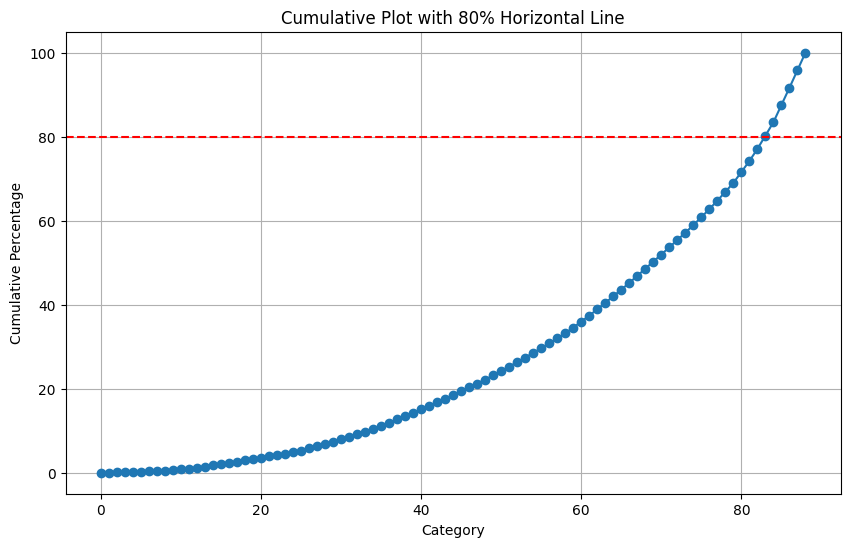

In [39]:




# Sort the DataFrame by the count column
neg_samples = neg_samples.sort_values(by='count', ascending=True)
neg_samples['serial_number'] = [i for i in range(len(neg_samples))]
# Calculate cumulative counts
neg_samples['cumulative_count'] = neg_samples['count'].cumsum()

# Normalize cumulative counts to get percentages
neg_samples['cumulative_percent'] = neg_samples['cumulative_count'] / neg_samples['count'].sum() * 100

# Plot cumulative counts
plt.figure(figsize=(10, 6))
plt.plot(neg_samples['serial_number'], neg_samples['cumulative_percent'], marker='o', linestyle='-')

# Add 80 percent horizontal line
plt.axhline(y=80, color='r', linestyle='--')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Plot with 80% Horizontal Line')
plt.grid(True)
plt.show()

In [40]:
neg_samples.tail(20)

,subject,count,clinical_pathological_AD,serial_number,cumulative_count,cumulative_percent
64,ROSMAP-43150,303,NCI_with_No_Plaques,69,9037,50.286573
62,ROSMAP-77461,303,NCI_with_No_Plaques,70,9340,51.972623
57,ROSMAP-96967,311,NCI_with_No_Plaques,71,9651,53.703188
56,ROSMAP-32550,312,NCI_with_No_Plaques,72,9963,55.439319
55,ROSMAP-32550,312,NCI_with_No_Plaques,73,10275,57.175449
50,ROSMAP-14875,322,NCI_with_No_Plaques,74,10597,58.967225
45,ROSMAP-58313,341,NCI_with_No_Plaques,75,10938,60.864727
43,ROSMAP-82353,345,NCI_with_No_Plaques,76,11283,62.784486
36,ROSMAP-13759,361,NCI_with_No_Plaques,77,11644,64.793278
34,ROSMAP-21157,379,NCI_with_No_Plaques,78,12023,66.902231


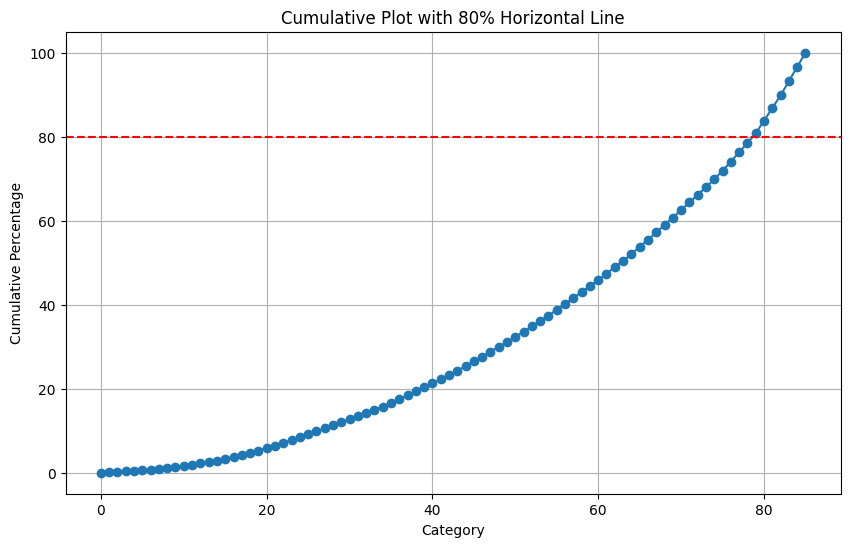

In [41]:
import pandas as pd
import matplotlib.pyplot as plt



# Sort the DataFrame by the count column
pos_samples = pos_samples.sort_values(by='count', ascending=True)
pos_samples['serial_number'] = [i for i in range(len(pos_samples))]
# Calculate cumulative counts
pos_samples['cumulative_count'] = pos_samples['count'].cumsum()

# Normalize cumulative counts to get percentages
pos_samples['cumulative_percent'] = pos_samples['cumulative_count'] / pos_samples['count'].sum() * 100

# Plot cumulative counts
plt.figure(figsize=(10, 6))
plt.plot(pos_samples['serial_number'], pos_samples['cumulative_percent'], marker='o', linestyle='-')

# Add 80 percent horizontal line
plt.axhline(y=80, color='r', linestyle='--')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Plot with 80% Horizontal Line')
plt.grid(True)
plt.show()

In [42]:
pos_samples.tail(20)

,subject,count,clinical_pathological_AD,serial_number,cumulative_count,cumulative_percent
104,ROSMAP-23298,262,AD_with_Plaques,66,8567,55.496534
98,ROSMAP-14589,270,AD_with_Plaques,67,8837,57.245579
96,ROSMAP-53808,273,AD_with_Plaques,68,9110,59.014057
95,ROSMAP-53808,273,AD_with_Plaques,69,9383,60.782535
94,ROSMAP-12078,273,AD_with_Plaques,70,9656,62.551014
87,ROSMAP-52889,280,AD_with_Plaques,71,9936,64.364838
86,ROSMAP-85806,281,AD_with_Plaques,72,10217,66.185140
85,ROSMAP-85806,281,AD_with_Plaques,73,10498,68.005441
72,ROSMAP-31874,289,AD_with_Plaques,74,10787,69.877567
54,ROSMAP-62252,315,AD_with_Plaques,75,11102,71.918119


In [43]:
train_pos_samples = pos_samples[pos_samples.cumulative_percent<=80].subject
test_pos_samples = pos_samples[pos_samples.cumulative_percent>80].subject

In [44]:
test_pos_samples 

37    ROSMAP-50941
25    ROSMAP-95064
24    ROSMAP-42915
23    ROSMAP-42915
13    ROSMAP-83589
12    ROSMAP-83589
11    ROSMAP-38572
Name: subject, dtype: object

In [45]:
train_neg_samples = neg_samples[neg_samples.cumulative_percent<=80].subject
test_neg_samples = neg_samples[neg_samples.cumulative_percent>80].subject

In [46]:
train_neg_samples

483    ROSMAP-61943
482    ROSMAP-92734
480    ROSMAP-20369
481    ROSMAP-20369
477    ROSMAP-97816
           ...     
34     ROSMAP-21157
35     ROSMAP-21157
22     ROSMAP-20815
21     ROSMAP-20815
14     ROSMAP-25736
Name: subject, Length: 83, dtype: object

In [ ]:
train_pos_samples

In [ ]:
train_samples = list(train_pos_samples) + (list(train_neg_samples))
test_samples = list(test_pos_samples) + (list(test_neg_samples))

In [ ]:
len(train_samples)

In [ ]:
len(test_samples)

In [ ]:
def return_train_test(x):
    if x in train_samples:
        return 'train'
    elif x in test_samples:
        return 'test'
    else:
        return np.nan

In [ ]:
single_cell_metadata['train_test_clinical_and_pathological'] = single_cell_metadata.subject.apply(return_train_test)

In [ ]:
single_cell_metadata.train_test_clinical_and_pathological.value_counts()

In [ ]:
single_cell_metadata[single_cell_metadata.train_test_clinical_and_pathological=='train'].clinical_pathological_AD.value_counts()

In [ ]:
single_cell_metadata[single_cell_metadata.train_test_clinical_and_pathological=='test'].clinical_pathological_AD.value_counts()

In [ ]:
single_cell_metadata

In [ ]:
single_cell_metadata.to_csv('../../preprocessed_data/metadata_microglia.csv', index = False)

In [ ]:
'LRIG2' in df_loaded.index.tolist()

In [ ]:
from biomart import BiomartServer

# Connect to the Ensembl Biomart server
server = BiomartServer("http://www.ensembl.org/biomart")

# Access the Ensembl Genes dataset for Homo sapiens
dataset = server.datasets['hsapiens_gene_ensembl']

# Query the dataset for Ensembl IDs and gene names
response = dataset.search({
    'attributes': [
        'ensembl_gene_id', 
        'external_gene_name'
    ]
})

# Convert the response to a dataframe
import pandas as pd
from io import StringIO

data = StringIO(response.text)

df = pd.read_csv(data, sep="\t",header = None)

# Display the first few rows of the dataframe
print(df.head())
# Nice

In [ ]:
df.tail(20)

In [ ]:
df_loaded

In [ ]:
len(set(df_loaded.index.tolist()).intersection(set(df[1])))

In [ ]:
df_loaded = df_loaded.reset_index()

In [ ]:
import numpy as np
def return_ensemble_id(x):
    try:
        return df[df[1]==x][0].values[0]
    except: 
        return np.nan

In [ ]:
x = df_loaded.reset_index().gene_name.apply(return_ensemble_id)

In [ ]:
x.value_counts()

In [ ]:
df_loaded['ensemble_gene_name'] = x

In [ ]:
df_loaded = df_loaded.dropna()
df_loaded

In [ ]:
df_loaded.set_index('ensemble_gene_name', inplace = True)

In [ ]:
df_loaded

In [ ]:
df[df[1]=='MT-ND5'][0].values[0]

In [ ]:
df_loaded = df_loaded.drop(columns='gene_name')
df_loaded

In [ ]:
pickle_file_path = '../preprocessed_data/count_matrix_ensemble_id_microglia.pkl'
df_loaded.to_pickle(pickle_file_path)

In [ ]:
df_loaded

In [ ]:
m = list(single_cell_metadata[single_cell_metadata.train_test_clinical_and_pathological == 'train'].cell_id)
label_train = list(single_cell_metadata[single_cell_metadata.train_test_clinical_and_pathological == 'train'].clinical_pathological_AD)
m[0:10]

In [ ]:
label_train[0:10]

In [ ]:
single_cell_metadata[single_cell_metadata.cell_id =='AAACCCAAGGTCGTCC.9.6'].clinical_pathological_AD

In [ ]:
train_count_matrix = df_loaded[m]
train_count_matrix

In [ ]:
n = list(single_cell_metadata[single_cell_metadata.train_test_clinical_and_pathological == 'test'].cell_id)
label_test = list(single_cell_metadata[single_cell_metadata.train_test_clinical_and_pathological == 'test'].clinical_pathological_AD)
n[0:10]

In [ ]:
test_count_matrix = df_loaded[n]
test_count_matrix

In [ ]:
single_cell_metadata[single_cell_metadata.cell_id =='AAACCCACAGCACAGA.23.6']

In [ ]:
test_label = pd.DataFrame(label_test,columns=['diagnosis'])
train_label = pd.DataFrame(label_train,columns=['diagnosis'])

In [ ]:
test_label.diagnosis.value_counts()

In [ ]:
train_label.diagnosis.value_counts()

In [ ]:
#/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/train_test_set

test_count_matrix.to_csv('/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/microglia/train_test_set/test_count_matrix.csv')
train_count_matrix.to_csv('/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/microglia/train_test_set/train_count_matrix.csv')

test_label.to_csv('/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/microglia/train_test_set/test_label.csv', index = False)
train_label.to_csv('/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/microglia/train_test_set/train_label.csv', index = False)

In [ ]:
rdata = pd.read_csv('/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/microglia/train_test_set/train_count_matrix.csv')
qdata = pd.read_csv('/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/microglia/train_test_set/test_count_matrix.csv')


In [ ]:
rlabel = pd.read_csv('/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/microglia/train_test_set/train_label.csv')
qlabel = pd.read_csv('/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/microglia/train_test_set/test_label.csv')

In [ ]:
rdata 

In [ ]:
rlabel

In [ ]:
single_cell_metadata

# Correlation PCA

In [50]:
rdata = pd.read_csv('/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/microglia/train_test_set/train_count_matrix.csv')
qdata = pd.read_csv('/12tb_dsk1/usman/Single_Cell_Microglia_Project/preprocessed_data/microglia/train_test_set/test_count_matrix.csv')
rdata.set_index('ensemble_gene_name', inplace =  True)
qdata.set_index('ensemble_gene_name', inplace =  True)
merged_data_clinical_pathological = pd.concat([rdata.T,qdata.T])


In [51]:
merged_data_clinical_pathological 

ensemble_gene_name,ENSG00000243485,ENSG00000237613,ENSG00000186092,ENSG00000284733,ENSG00000284662,ENSG00000177757,ENSG00000225880,ENSG00000230368,ENSG00000187634,ENSG00000188976,...,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727,ENSG00000274847
AAACCCAAGAGCCATG.10.13,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,2,0,0,1,0
AAACCCAAGCAGTACG.2.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
AAACCCAAGCTGCCTG.9.14,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
AAACCCAAGGCAGGGA.9.9,0,0,0,0,0,0,0,0,0,0,...,0,1,2,2,0,0,0,0,2,0
AAACCCAAGGCATGGT.13.12,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGTCTTAGGAC.32.9,0,0,0,0,0,0,0,0,0,0,...,0,2,6,4,0,1,0,0,5,0
TTTGTTGAGATCACTC.6.2,0,0,0,0,0,0,0,0,0,0,...,0,1,7,0,0,1,0,0,1,0
TTTGTTGAGCGGATCA.8.11,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TTTGTTGCACAGCTTA.20.11,0,0,0,0,0,0,0,0,0,1,...,0,3,1,0,1,2,0,0,1,0


In [52]:
single_cell_metadata = pd.read_csv('../../preprocessed_data/microglia/metadata_microglia.csv')
single_cell_metadata

,cell_id,seq_folder,nUMI,nGene,percent.mt,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,log10GenesPerUMI,individualID,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD,train_test_clinical_and_pathological
0,AAACCCAAGACGATAT.4.3,ROSMAP,1199,863,0.667223,Mic P2RY12,ROSMAP-86217,no,0.953616,R5636935,False,No AD,False,NaN
1,AAACCCAAGACGGATC.14.13,ROSMAP,2510,1581,1.434263,Mic P2RY12,ROSMAP-43251,yes,0.940953,R9679238,AD,False,False,NaN
2,AAACCCAAGAGCCATG.10.13,ROSMAP,971,662,1.132853,Mic P2RY12,ROSMAP-55106,no,0.944309,R2506056,NCI,No AD,NCI_with_No_Plaques,train
3,AAACCCAAGAGCGACT.27.5,ROSMAP,1360,953,1.176471,Mic P2RY12,ROSMAP-45924,yes,0.950712,R4249236,False,False,False,NaN
4,AAACCCAAGCAACAGC.31.10,ROSMAP,3610,2024,1.274238,Mic P2RY12,ROSMAP-98683,yes,0.929362,R2144127,AD,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73056,TTTGTTGTCGCTGTCT.3.8,ROSMAP,995,745,1.708543,Mic P2RY12,ROSMAP-70249,no,0.958081,R4292728,False,No AD,False,NaN
73057,TTTGTTGTCGTGTGGC.22.6,ROSMAP,1582,1142,0.063211,Mic P2RY12,ROSMAP-75656,yes,0.955758,R5546461,AD,AD,AD_with_Plaques,train
73058,TTTGTTGTCTAGACAC.20.9,ROSMAP,2142,1382,1.260504,Mic P2RY12,ROSMAP-38977,yes,0.942863,R2575548,NCI,AD,False,NaN
73059,TTTGTTGTCTCAACCC.29.8,ROSMAP,4339,2189,0.622263,Mic P2RY12,ROSMAP-75281,yes,0.918308,R9596785,False,False,False,NaN


In [53]:
clinical_data = pd.read_csv('/12tb_dsk1/danish/preprocessed_data/clinical/clinical_single_cell.csv')
clinical_data

,individualID,individualIdSource,sex,ethnicity,subject,projid,Study,msex,educ,spanish,...,age_death,cts_mmse30_first_ad_dx,cts_mmse30_lv,braaksc,ceradsc,cogdx,dcfdx_lv,clinical_diagnosis,pathological_diagnosis,clinical_pathological_AD
0,R2626559,Rush,male,NaN,ROSMAP-45310,1211411,ROS,1.0,12.0,2.0,...,85.549624,NaN,24.0,1.0,4.0,4.0,4.0,AD,No AD,False
1,R9936070,Rush,male,NaN,ROSMAP-34387,2899847,MAP,1.0,14.0,2.0,...,74.450376,NaN,27.0,2.0,2.0,3.0,3.0,False,False,False
2,R2367199,Rush,male,NaN,ROSMAP-69520,3713990,MAP,1.0,12.0,2.0,...,87.928816,NaN,30.0,4.0,2.0,1.0,1.0,NCI,False,False
3,R9891381,Rush,female,NaN,ROSMAP-53306,3889845,MAP,0.0,13.0,2.0,...,90.000000,NaN,22.0,2.0,1.0,2.0,2.0,False,AD,False
4,R9033345,Rush,male,NaN,ROSMAP-79585,6107196,MAP,1.0,15.0,2.0,...,90.000000,NaN,22.0,5.0,1.0,4.0,4.0,AD,AD,AD_with_Plaques
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,R9738414,Rush,female,NaN,ROSMAP-90149,20976799,ROS,0.0,18.0,2.0,...,90.000000,NaN,19.0,2.0,4.0,2.0,2.0,False,No AD,False
510,R7737688,Rush,female,NaN,NaN,69866926,MAP,0.0,13.0,2.0,...,84.104038,20.0,3.0,6.0,1.0,4.0,4.0,AD,AD,AD_with_Plaques
511,R7844746,Rush,male,NaN,NaN,29286432,ROS,1.0,24.0,2.0,...,90.000000,NaN,29.0,5.0,2.0,2.0,2.0,False,False,False
512,R6692433,Rush,female,NaN,NaN,48331728,MAP,0.0,14.0,2.0,...,82.715948,NaN,27.0,2.0,4.0,1.0,1.0,NCI,No AD,NCI_with_No_Plaques


In [54]:
clinical_data.age_first_ad_dx.value_counts()

age_first_ad_dx
90+                   40
77.097878165639969     3
79.991786447638603     2
79.89596167008898      2
82.35455167693361      2
                      ..
81.51403148528405      1
83.036276522929498     1
73.051334702258728     1
82.472279260780283     1
85.62354551676934      1
Name: count, Length: 107, dtype: int64

In [55]:
single_cell_metadata = pd.merge(single_cell_metadata,clinical_data[['subject','age_death','msex','educ','age_first_ad_dx','cogdx','ceradsc','braaksc','apoe_genotype']], on = 'subject', how = 'left')

In [56]:
single_cell_metadata = single_cell_metadata.drop(columns=['apoe_genotype'])
single_cell_metadata

,cell_id,seq_folder,nUMI,nGene,percent.mt,cell_type_high_resolution,subject,Pathologic_diagnosis_of_AD,log10GenesPerUMI,individualID,...,pathological_diagnosis,clinical_pathological_AD,train_test_clinical_and_pathological,age_death,msex,educ,age_first_ad_dx,cogdx,ceradsc,braaksc
0,AAACCCAAGACGATAT.4.3,ROSMAP,1199,863,0.667223,Mic P2RY12,ROSMAP-86217,no,0.953616,R5636935,...,No AD,False,NaN,83.975359,0.0,10.0,76.709103353867221,2.0,4.0,2.0
1,AAACCCAAGACGGATC.14.13,ROSMAP,2510,1581,1.434263,Mic P2RY12,ROSMAP-43251,yes,0.940953,R9679238,...,False,False,NaN,82.370979,1.0,24.0,81.648186173853531,4.0,2.0,3.0
2,AAACCCAAGAGCCATG.10.13,ROSMAP,971,662,1.132853,Mic P2RY12,ROSMAP-55106,no,0.944309,R2506056,...,No AD,NCI_with_No_Plaques,train,80.435318,0.0,21.0,NaN,1.0,4.0,3.0
3,AAACCCAAGAGCGACT.27.5,ROSMAP,1360,953,1.176471,Mic P2RY12,ROSMAP-45924,yes,0.950712,R4249236,...,False,False,NaN,84.364134,1.0,21.0,NaN,2.0,2.0,3.0
4,AAACCCAAGCAACAGC.31.10,ROSMAP,3610,2024,1.274238,Mic P2RY12,ROSMAP-98683,yes,0.929362,R2144127,...,False,False,NaN,89.374401,0.0,12.0,85.861738535249827,4.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89587,TTTGTTGTCGTGTGGC.22.6,ROSMAP,1582,1142,0.063211,Mic P2RY12,ROSMAP-75656,yes,0.955758,R5546461,...,AD,AD_with_Plaques,train,90.000000,0.0,14.0,90+,4.0,1.0,3.0
89588,TTTGTTGTCTAGACAC.20.9,ROSMAP,2142,1382,1.260504,Mic P2RY12,ROSMAP-38977,yes,0.942863,R2575548,...,AD,False,NaN,84.208077,1.0,18.0,NaN,1.0,1.0,4.0
89589,TTTGTTGTCTCAACCC.29.8,ROSMAP,4339,2189,0.622263,Mic P2RY12,ROSMAP-75281,yes,0.918308,R9596785,...,False,False,NaN,85.850787,1.0,20.0,NaN,2.0,2.0,4.0
89590,TTTGTTGTCTCTTAAC.4.2,ROSMAP,5354,2536,0.074710,Mic P2RY12,ROSMAP-33422,no,0.912964,R4260171,...,No AD,NCI_with_No_Plaques,train,78.234086,1.0,16.0,NaN,1.0,4.0,1.0


In [57]:
covariates_dataframe = pd.merge(merged_data_clinical_pathological.reset_index()['index'],single_cell_metadata[['cell_id','subject','age_death','msex','educ','age_first_ad_dx','cogdx','ceradsc','braaksc',
                                                                                        'clinical_pathological_AD']] , left_on='index', right_on='cell_id', how='inner')
         

In [58]:
covariates_dataframe = covariates_dataframe.drop_duplicates()
covariates_dataframe.set_index('cell_id',inplace = True)
covariates_dataframe.head()

,index,subject,age_death,msex,educ,age_first_ad_dx,cogdx,ceradsc,braaksc,clinical_pathological_AD
cell_id,,,,,,,,,,
AAACCCAAGAGCCATG.10.13,AAACCCAAGAGCCATG.10.13,ROSMAP-55106,80.435318,0.0,21.0,NaN,1.0,4.0,3.0,NCI_with_No_Plaques
AAACCCAAGCAGTACG.2.9,AAACCCAAGCAGTACG.2.9,ROSMAP-82353,81.911020,0.0,16.0,NaN,1.0,4.0,4.0,NCI_with_No_Plaques
AAACCCAAGCTGCCTG.9.14,AAACCCAAGCTGCCTG.9.14,ROSMAP-97833,83.537303,1.0,21.0,NaN,1.0,4.0,4.0,NCI_with_No_Plaques
AAACCCAAGGCAGGGA.9.9,AAACCCAAGGCAGGGA.9.9,ROSMAP-14875,81.859001,0.0,20.0,NaN,1.0,4.0,1.0,NCI_with_No_Plaques
AAACCCAAGGCATGGT.13.12,AAACCCAAGGCATGGT.13.12,ROSMAP-99585,90.000000,1.0,21.0,87.331964407939765,4.0,1.0,4.0,AD_with_Plaques


In [59]:
try:
    covariates_dataframe.drop(columns=['index'],inplace = True)
except:
    print('no such columns, probably I am running this snippet second time')
covariates_dataframe.head()

,subject,age_death,msex,educ,age_first_ad_dx,cogdx,ceradsc,braaksc,clinical_pathological_AD
cell_id,,,,,,,,,
AAACCCAAGAGCCATG.10.13,ROSMAP-55106,80.435318,0.0,21.0,NaN,1.0,4.0,3.0,NCI_with_No_Plaques
AAACCCAAGCAGTACG.2.9,ROSMAP-82353,81.911020,0.0,16.0,NaN,1.0,4.0,4.0,NCI_with_No_Plaques
AAACCCAAGCTGCCTG.9.14,ROSMAP-97833,83.537303,1.0,21.0,NaN,1.0,4.0,4.0,NCI_with_No_Plaques
AAACCCAAGGCAGGGA.9.9,ROSMAP-14875,81.859001,0.0,20.0,NaN,1.0,4.0,1.0,NCI_with_No_Plaques
AAACCCAAGGCATGGT.13.12,ROSMAP-99585,90.000000,1.0,21.0,87.331964407939765,4.0,1.0,4.0,AD_with_Plaques


In [60]:
covariates_dataframe = covariates_dataframe.sort_index()
covariates_dataframe = covariates_dataframe[['age_death','msex','educ','cogdx','ceradsc','braaksc']]
covariates_dataframe = covariates_dataframe.astype(float)
covariates_dataframe

,age_death,msex,educ,cogdx,ceradsc,braaksc
cell_id,,,,,,
AAACCCAAGAGCCATG.10.13,80.435318,0.0,21.0,1.0,4.0,3.0
AAACCCAAGCAGTACG.2.9,81.911020,0.0,16.0,1.0,4.0,4.0
AAACCCAAGCTGCCTG.9.14,83.537303,1.0,21.0,1.0,4.0,4.0
AAACCCAAGGCAGGGA.9.9,81.859001,0.0,20.0,1.0,4.0,1.0
AAACCCAAGGCATGGT.13.12,90.000000,1.0,21.0,4.0,1.0,4.0
...,...,...,...,...,...,...
TTTGTTGTCACGGTCG.8.6,89.086927,1.0,12.0,1.0,4.0,3.0
TTTGTTGTCAGAACCT.45.2,87.419576,1.0,23.0,4.0,1.0,6.0
TTTGTTGTCCAGTGCG.3.5,81.911020,0.0,16.0,1.0,4.0,4.0


In [61]:
merged_data_clinical_pathological = merged_data_clinical_pathological.sort_index()
merged_data_clinical_pathological

ensemble_gene_name,ENSG00000243485,ENSG00000237613,ENSG00000186092,ENSG00000284733,ENSG00000284662,ENSG00000177757,ENSG00000225880,ENSG00000230368,ENSG00000187634,ENSG00000188976,...,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727,ENSG00000274847
AAACCCAAGAGCCATG.10.13,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,2,0,0,1,0
AAACCCAAGCAGTACG.2.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
AAACCCAAGCTGCCTG.9.14,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
AAACCCAAGGCAGGGA.9.9,0,0,0,0,0,0,0,0,0,0,...,0,1,2,2,0,0,0,0,2,0
AAACCCAAGGCATGGT.13.12,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCACGGTCG.8.6,0,0,0,0,0,0,0,0,0,0,...,0,2,3,1,0,2,0,0,2,0
TTTGTTGTCAGAACCT.45.2,0,0,0,0,0,0,0,0,0,0,...,0,27,15,25,0,12,2,0,16,0
TTTGTTGTCCAGTGCG.3.5,0,0,0,0,0,0,0,0,0,1,...,0,2,4,0,0,0,0,0,1,0
TTTGTTGTCGTGTGGC.22.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming merged_data_clinical_pathological is your data matrix (samples x features)
# and labels is a list/array of labels corresponding to each sample

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data_clinical_pathological)

# Perform PCA
pca = PCA(n_components=10)  # Choose number of components
principal_components = pca.fit_transform(scaled_data)

In [63]:
pca.explained_variance_ratio_

array([0.02963611, 0.00237102, 0.00179438, 0.0013373 , 0.00114981,
       0.00101685, 0.00084531, 0.00075512, 0.0007068 , 0.00068896])

In [64]:
principal_components

array([[-26.43653167,  -0.43458564,   2.13520608, ...,  -1.89304083,
          0.565888  ,  -0.14743508],
       [ 10.27652516,  10.02163939,   0.82160085, ...,   3.71442129,
         -0.3887953 ,  -0.38951664],
       [-22.58088343,   1.050127  ,  -1.05196732, ...,   0.87331468,
          0.72851392,  -0.23354038],
       ...,
       [ 19.70619431,   8.56438614,  -3.29491721, ...,   5.56598171,
         -2.47219134,   5.04906057],
       [-15.57795814,  -0.06622508,   2.36819987, ...,  -4.74126952,
          0.70464496,   1.62651524],
       [ 33.38722518, -10.54800127,  -8.05588582, ...,  -0.97587915,
         -0.26762007,   2.4846466 ]])

In [67]:
correlation_matrix = np.corrcoef(principal_components.T, covariates_dataframe.T)[:principal_components.shape[1], principal_components.shape[1]:]


Text(0.5, 1.0, 'Correlation between PCs and Covariates')

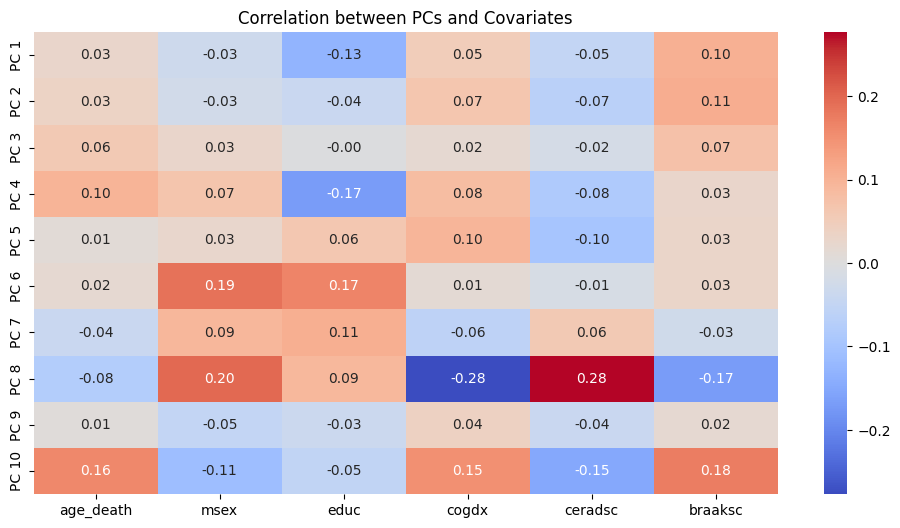

In [70]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=covariates_dataframe.columns,
            yticklabels=[f'PC {i+1}' for i in range(principal_components.shape[1])], ax=ax1)
ax1.set_title('Correlation between PCs and Covariates')

In [71]:
def shuffle_column(column):
    np.random.shuffle(column)
    return column

def permutation_test_covariates(df):
    shuffled_df = df.copy()
    return shuffled_df.reindex(np.random.permutation(shuffled_df.index))

In [72]:
shuffled_covariates = permutation_test_covariates(covariates_dataframe)

In [73]:
shuffled_covariates

,age_death,msex,educ,cogdx,ceradsc,braaksc
cell_id,,,,,,
CTGATCCCAACTGATC.27.9,88.960986,1.0,20.0,4.0,1.0,4.0
TACGCTCCACCCTTAC.6.13,83.304586,1.0,27.0,1.0,4.0,4.0
TCGGGCAAGCCTGAAG.25.8,90.000000,0.0,12.0,1.0,4.0,4.0
TGGATCATCGACGTCG.31.11,82.026010,1.0,19.0,4.0,1.0,5.0
ATCGGCGGTGAGGAAA.26.2,89.308693,0.0,12.0,4.0,1.0,5.0
...,...,...,...,...,...,...
TAGAGTCGTCGAATGG.8.8,90.000000,0.0,12.0,4.0,1.0,6.0
CATAAGCCACGATTCA.28.6,90.000000,0.0,12.0,1.0,4.0,3.0
CTGAATGTCTACTCAT.11.12,90.000000,0.0,12.0,4.0,1.0,5.0


In [74]:
principal_components.T.shape

(10, 25877)

In [75]:

covariates_clinical_data_AD_NCI = covariates_dataframe
X_pca_expression = principal_components

li = [[[] for i in range(covariates_clinical_data_AD_NCI.T.shape[0])] for l in range(X_pca_expression.shape[1])]
for l in range(X_pca_expression.shape[1]):
    x = np.array(np.array(X_pca_expression.T[l]))
    for i in range(1000):
        shuffled_covariates = permutation_test_covariates(covariates_clinical_data_AD_NCI)
        
        for k,j in enumerate(range(shuffled_covariates.T.shape[0])):
            y = np.array(np.array(shuffled_covariates.T.iloc[j,]))
            corr = np.corrcoef(x,y)[0,1]
            li[l][k].append(corr)

In [76]:
li.shape

AttributeError: 'list' object has no attribute 'shape'

In [77]:
li = np.array(li)
li = np.sort(np.abs(li), axis=1)
percentiles_90 = np.percentile(li, 90, axis=1)
percentiles_90

array([[0.00802568, 0.00693796, 0.00642946, ..., 0.01113155, 0.01154842,
        0.01498778],
       [0.00900295, 0.00978701, 0.01093003, ..., 0.01224911, 0.01199517,
        0.00769879],
       [0.00732681, 0.00757502, 0.00900958, ..., 0.00660561, 0.00648012,
        0.00505433],
       ...,
       [0.00925531, 0.01115893, 0.01149895, ..., 0.00545674, 0.0089574 ,
        0.01461899],
       [0.00838265, 0.00707636, 0.00890855, ..., 0.00859444, 0.0119333 ,
        0.00466548],
       [0.00897757, 0.01228324, 0.00376009, ..., 0.00628991, 0.00815051,
        0.00949922]])

In [78]:
li_pc_fdr = []
for i in li:   
    li_ = np.array(i)
    li_ = np.sort(np.abs(li_), axis=1)
    percentiles_90 = np.percentile(li_, 90, axis=1)
    li_pc_fdr.append(list(percentiles_90))

In [79]:
np.array(li_pc_fdr).shape

(10, 6)

Text(0.5, 1.0, 'Correlation between PCs and Covariates')

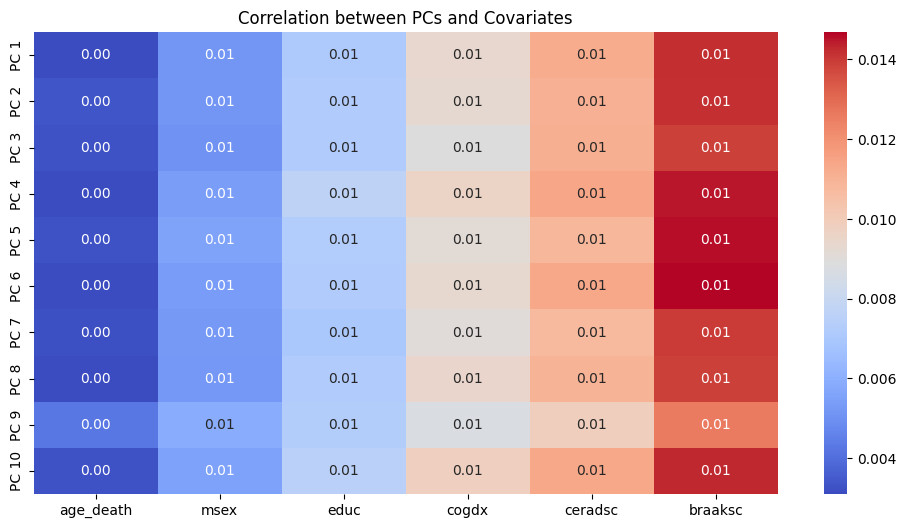

In [80]:
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.heatmap(np.array(li_pc_fdr), annot=True, cmap='coolwarm', fmt='.2f', xticklabels=covariates_clinical_data_AD_NCI.columns, yticklabels=[f'PC {i+1}' for i in range(X_pca_expression.shape[1])], ax=ax1)
ax1.set_title('Correlation between PCs and Covariates')

Text(0.5, 1.0, 'Correlation between PCs and Covariates')

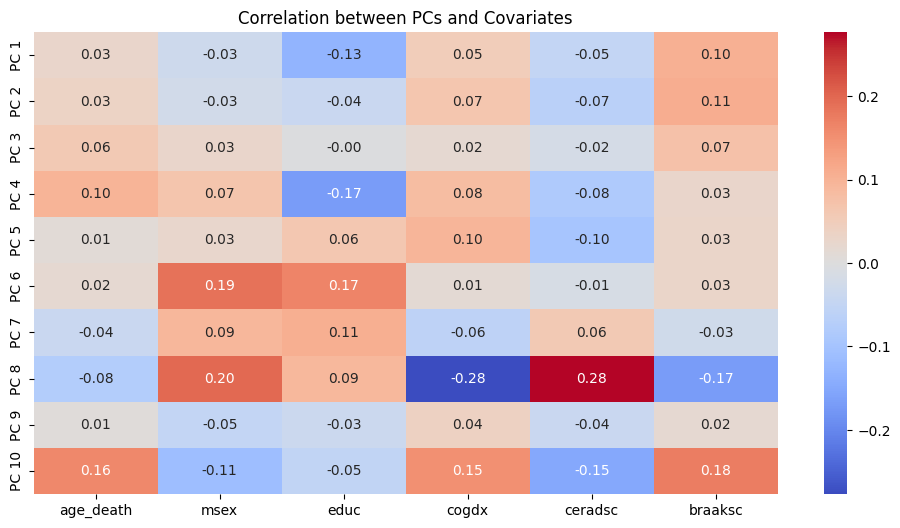

In [81]:
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=covariates_dataframe.columns,
            yticklabels=[f'PC {i+1}' for i in range(principal_components.shape[1])], ax=ax1)
ax1.set_title('Correlation between PCs and Covariates')